---

Lambda School Data Science

*Unit 4, Sprint 1, Module 1*

---
<h1 id="moduleTitle"> Natural Language Processing Introduction (Prepare)</h1>

"Natural" meaning - not computer languages but spoken/written human languages. The hard thing about NLP is that human languages are far less structured or consistent than computer languages. This is perhaps the largest source of difficulty when trying to get computers to "understand" human languages. How do you get a machine to understand sarcasm, and irony, and synonyms, connotation, denotation, nuance, and tone of voice --all without it having lived a lifetime of experience for context? If you think about it, our human brains have been exposed to quite a lot of training data to help us interpret languages, and even then we misunderstand each other pretty frequently. 
    

<h2 id='moduleObjectives'>Learning Objectives</h2>

By the end of end of this module, a student should be able to:
* <a href="#p1">Objective 1</a>: Tokenize text
* <a href="#p1">Objective 2</a>: Remove stop words from text
* <a href="#p3">Objective 3</a>: Perform stemming and lemmatization on tokens

## Conda Environments

You will be completing each module this sprint on your machine. We will be using conda environments to manage the packages and their dependencies for this sprint's content. In a classroom setting, instructors typically abstract away environment for you. However, environment management is an important professional data science skill. We showed you how to manage environments using pipvirtual env during Unit 3, but in this sprint, we will introduce an environment management tool common in the data science community: 

> __conda__: Package, dependency and environment management for any language—Python, R, Ruby, Lua, Scala, Java, JavaScript, C/ C++, FORTRAN, and more.

The easiest way to install conda on your machine is via the [Anaconda Distribution](https://www.anaconda.com/distribution/) of Python & R. Once you have conda installed, read ["A Guide to Conda Environments"](https://towardsdatascience.com/a-guide-to-conda-environments-bc6180fc533). This article will provide an introduce into some of the conda basics. If you need some additional help getting started, the official ["Setting started with conda"](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) guide will point you in the right direction. 

:snake: 

To get the sprint environment setup: 

1. Open your command line tool (Terminal for MacOS, Anaconda Prompt for Windows)
2. Navigate to the folder with this sprint's content. There should be a `requirements.txt`
3. Run `conda create -n U4-S1-NLP python==3.7` => You can also rename the environment if you would like. Once the command completes, your conda environment should be ready.
4. Now, we are going to add in the require python packages for this sprint. You will need to 'activate' the conda environment: `source activate U4-S1-NLP` on Terminal or `conda activate U4-S1-NLP` on Anaconda Prompt. Once your environment is activate, run `pip install -r requirements.txt` which will install the required packages into your environment.
5. We are going to also add an Ipython Kernel reference to your conda environment, so we can use it from JupyterLab. 
6. Next run `python -m ipykernel install --user --name U4-S1-NLP --display-name "U4-S1-NLP (Python3)"` => This will add a json object to an ipython file, so JupterLab will know that it can use this isolated instance of Python. :) 
7. Last step, we need to install the models for Spacy. Run these commands `python -m spacy download en_core_web_md` and `python -m spacy download en_core_web_lg`
8. Deactivate your conda environment and launch JupyterLab. You should know see "U4-S1-NLP (Python3)" in the list of available kernels on launch screen. 

In [1]:
# Dependencies for the week (instead of conda)
# Run if you're using colab, otherwise you should have a local copy of the data
#!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
# !pip install -r requirements.txt

In [2]:
# You'll use en_core_web_sm for the sprint challenge due memory constraints on Codegrader
#!python -m spacy download en_core_web_sm 

# Locally (or on colab) let's use en_core_web_lg 
# !python -m spacy download en_core_web_lg # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

# Tokenze Text (Learn)
<a id="p1"></a>

## Overview

> **token**: an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing

> [_*Introduction to Information Retrival*_](https://nlp.stanford.edu/IR-book/)


### The attributes of good tokens

* Should be stored in an iterable data structure
  - Allows analysis of the "semantic unit"
* Should be all the same case
  - Reduces the complexity of our data
* Should be free of non-alphanumeric characters (ie punctuation, whitespace)
  - Removes information that is probably not relevant to the analysis

Let's pretend we are trying analyze the random sequence here. Question: what is the most common character in this sequence?

In [3]:
random_seq = "AABAAFBBBBCGCDDEEEFCFFDFFAFFZFGGGGHEAFJAAZBBFCZ"

A useful unit of analysis for us is going to be a letter or character

In [4]:
tokens = list(random_seq)
print(tokens)

['A', 'A', 'B', 'A', 'A', 'F', 'B', 'B', 'B', 'B', 'C', 'G', 'C', 'D', 'D', 'E', 'E', 'E', 'F', 'C', 'F', 'F', 'D', 'F', 'F', 'A', 'F', 'F', 'Z', 'F', 'G', 'G', 'G', 'G', 'H', 'E', 'A', 'F', 'J', 'A', 'A', 'Z', 'B', 'B', 'F', 'C', 'Z']


Our tokens are already "good": in an iterable datastructure, all the same case, and free of noise characters (punctuation, whitespace), so we can jump straight into analysis.

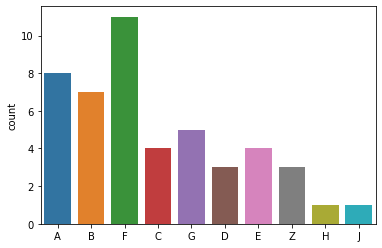

In [5]:
import seaborn as sns

sns.countplot(tokens);

The most common character in our sequence is  "F". We can't just glance at the the sequence to know which character is the most common. We (humans) struggle to subitize complex data (like random text sequences).

> __Subitize__ is the ability to tell the number of objects in a set, quickly, without counting.  

We need to chunk the data into countable pieces "tokens" for us to analyze them. This inability subitize text data is the motivation for our discussion today.

### Tokenizing with Pure Python

In [6]:
sample = "Friends, Romans, countrymen, lend me your ears;"

##### Iterable Tokens

A string object in Python is already iterable. However, the item you iterate over is a character not a token:

```
from time import sleep
for num, character in enumerate(sample):
    sleep(.5)
    print(f"Char {num} - {character}", end="\r")
```

If we instead care about the words in our sample (our semantic unit), we can use the string method `.split()` to separate the whitespace and create iterable units. :)

In [7]:
dir(sample)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [8]:
sample.split(" ")

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

##### Case Normalization
A common data cleaning data cleaning task with token is to standardize or normalize the case. Normalizing case reduces the chance that you have duplicate records for things which have practically the same semantic meaning. You can use either the `.lower()` or `.upper()` string methods to normalize case.

Consider the following example: 

In [9]:
import pandas as pd

df = pd.read_csv('/Users/rob/PycharmProjects/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
print(df.shape)

(28332, 24)


In [10]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [11]:
df['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

In [12]:
# Get the count of how many times each unique brand occurs
df['brand'] = df['brand'].apply(lambda x: x.lower())
df.brand.value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

##### Keep Only Alphanumeric Characters
Yes, we only want letters and numbers. Everything else is probably noise: punctuation, whitespace, and other notation. This one is little bit more complicated than our previous example. Here we will have to import the base package `re` (regular expressions). 

The only regex expression pattern you need for this is `'[^a-zA-Z 0-9]'` which keeps lower case letters, upper case letters, spaces, and numbers.

In [13]:
sample = sample +" 911"
print(sample)

Friends, Romans, countrymen, lend me your ears; 911


In [14]:
import re

re.sub('[^a-zA-Z 0-9]', '', sample)

'Friends Romans countrymen lend me your ears 911'

#### Two Minute Challenge 
- Complete the function `tokenize` below
- Combine the methods which we discussed above to clean text before we analyze it
- You can put the methods in any order you want

In [15]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    lower = text.lower()
    lower_no_punc = re.sub('[^a-z 0-9]', '', lower)
    tokens = lower_no_punc.split()
    
    return tokens

In [16]:
# this should be your output
tokenize(sample)

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears', '911']

In [17]:
long_string = ' '.join(df['reviews.text'].to_list())
print(len(long_string))

3924466


In [18]:
unique_chars = set(list(long_string))
print(len(unique_chars))
unique_chars

111


{' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '©',
 '¬',
 '¶',
 'º',
 'Ä',
 'Å',
 'Ô',
 'ã',
 'è',
 'ì',
 'ò',
 'ô',
 'ù',
 'ú',
 'ƒ',
 '‚',
 '†',
 '∏',
 '√',
 '∞',
 '∫',
 '≤'}

In [19]:
clean_string = re.sub('[^a-zA-Z 0-9]', '', long_string)

unique_chars = set(list(clean_string))
print(len(unique_chars))
unique_chars

63


{' ',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

## Follow Along

Our inability to analyze text data becomes quickly amplified in a business context. Consider the following: 

A business which sells widgets also collects customer reviews of those widgets. When the business first started out, they had a human read the reviews to look for patterns. Now, the business sells thousands of widgets a month. The human readers can't keep up with the pace of reviews to synthesize an accurate analysis. They need some science to help them analyze their data.

Now, let's pretend that business is Amazon, and the widgets are Amazon products such as the Alexa, Echo, or other AmazonBasics products. Let's analyze their reviews with some counts. This dataset is available on [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/).

In [20]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_md')

In [21]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [22]:
df['reviews.text'].value_counts()

good                                                                                                                                                        60
great                                                                                                                                                       49
Good                                                                                                                                                        42
Great                                                                                                                                                       38
ok                                                                                                                                                          33
                                                                                                                                                            ..
Best bang for the buck on lot of batteries! Ch

In [23]:
df['tokens'] = df['reviews.text'].apply(lambda x: tokenize(x))
df['tokens'].head()

0    [i, order, 3, of, them, and, one, of, the, ite...
1    [bulk, is, always, the, less, expensive, way, ...
2    [well, they, are, not, duracell, but, for, the...
3    [seem, to, work, as, well, as, name, brand, ba...
4    [these, batteries, are, very, long, lasting, t...
Name: tokens, dtype: object

#### Analyzing Tokens

In [24]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 28836),
 ('and', 22302),
 ('i', 20588),
 ('to', 19537),
 ('for', 17918),
 ('a', 17599),
 ('it', 16793),
 ('is', 11482),
 ('my', 11149),
 ('this', 10420)]

Let's create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.

In [25]:
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [26]:
# Use the Function
wc = count(df['tokens'])
print(wc.shape)
wc.head()

(12895, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
23,the,13185,28836,1.0,0.039350,0.039350,0.465375
13,and,13731,22302,2.0,0.030434,0.069784,0.484646
5,i,10301,20588,3.0,0.028095,0.097879,0.363582
14,to,11312,19537,4.0,0.026661,0.124539,0.399266
28,for,12101,17918,5.0,0.024451,0.148990,0.427114


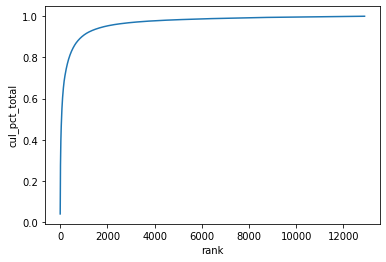

In [27]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [28]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.6012123263182888

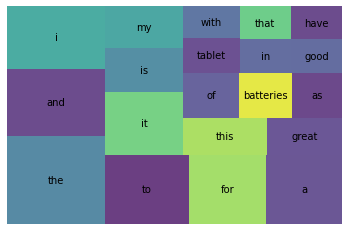

In [29]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

### Processing Raw Text with Spacy

Spacy's datamodel for documents is unique among NLP libraries. Instead of storing the documents components in various data structures, Spacy indexes components and simply stores the lookup information. 

This is often why Spacy is considered to be more production grade than library like NLTK.

In [30]:
sample = """
Natural Language Processing Summary
The field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).

“Nat­ur­al Lan­guage Pro­cessing is a field that cov­ers com­puter un­der­stand­ing and ma­nip­u­la­tion of hu­man lan­guage, and it’s ripe with pos­sib­il­it­ies for news­gath­er­ing,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usu­ally hear about it in the con­text of ana­lyz­ing large pools of legis­la­tion or other doc­u­ment sets, at­tempt­ing to dis­cov­er pat­terns or root out cor­rup­tion.”
"""

In [31]:
doc = nlp(sample)

In [32]:
dir(doc)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_get_array_attrs',
 '_py_tokens',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_ents',
 'se

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs


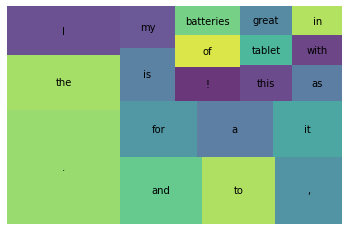

In [33]:
%time
# nlp.disable_pipes('tagger', 'parser')
import en_core_web_md
nlp = en_core_web_md.load(disable=["tagger", "parser", "ner", "lemmatizer"])

# create a tokenizer using spacy 
spacy_tokens = []
for doc in nlp.pipe(df['reviews.text'], disable = ['tagger', 'parser']):
    
    doc_tokens = []
    for token in doc:
        doc_tokens.append(token.text)
        
    spacy_tokens.append(doc_tokens)
    
df['spacy_tokens'] = spacy_tokens

wc = count(df['spacy_tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [34]:
wc.shape

(13782, 7)

In [35]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [36]:
token.text

'.'

In [37]:
token.is_punct

True

In [38]:
token.pos_

''

## Challenge

In the module project, you will apply tokenization to another set of review data and produce visualizations of those tokens. 

# Stop Words (Learn)
<a id="p2"></a>

## Overview
Section Agenda
- What are they?
- How do we get rid of them using Spacy?
- Visualization
- Libraries of Stop Words
- Extending Stop Words
- Statistical trimming

If the visualizations above, you began to notice a pattern. Most of the words don't really add much to our understanding of product reviews. Words such as "I", "and", "of", etc. have almost no semantic meaning to us. We call these useless words "stop words," because we should 'stop' ourselves from including them in the analysis. 

Most NLP libraries have built in lists of stop words that common english words: conjunctions, articles, adverbs, pronouns, and common verbs. The best practice, however, is to extend/customize these standard english stopwords for your problem's domain. If I am studying political science, I may want to exclude the word "politics" from my analysis; it's so common it does not add to my understanding. 

## Follow Along 

### Default Stop Words
Let's take a look at the standard stop words that came with our Spacy model:

In [39]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [40]:
%time
# Use spacy to create a tokenizer that removes stop words
# nlp.disable_pipes('tagger', 'parser')

# create a tokenizer using spacy
spacy_tokens = []
for doc in nlp.pipe(df['reviews.text'], disable=['parser', 'tagger']):
    
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (len(token.text) > 2):
            doc_tokens.append(token.text.lower())
        
    spacy_tokens.append(doc_tokens)
    
df['spacy_tokens_v2'] = spacy_tokens

wc = count(df['spacy_tokens_v2'])
print(wc.shape)


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.01 µs
(10514, 7)


### Extending Stop Words

In [41]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [42]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])

### Statistical Trimming

So far, we have talked about stop word in relation to either broad english words or domain specific stop words. Another common approach to stop word removal is via statistical trimming. The basic idea: preserve the words that give the most about of variation in your data. 

Do you remember this graph?

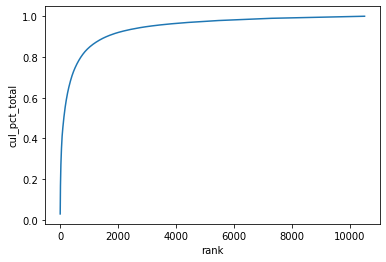

In [43]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

This graph tells us that only a *handful* of words represented 80% of words in the overall corpus. We can interpret this in two ways: 
1. The words that appear most frequently may not provide any insight into the mean on the documents since they are so prevalent. 
2. Words that appear infrequency (at the end of the graph) also probably do not add much value, because the are mentioned so rarely. 

Let's take a look at the words at the bottom and the top and make a decision for ourselves:

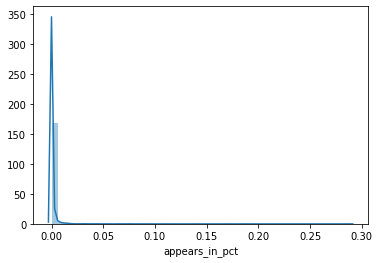

In [44]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

In [45]:
wc.tail(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10506,mounts,1,1,10505.0,0.000003,0.999972,0.000035
10505,magnetically,1,1,10506.0,0.000003,0.999975,0.000035
10503,vent,1,1,10507.0,0.000003,0.999978,0.000035
10507,kindlelishous,1,1,10508.0,0.000003,0.999981,0.000035
10508,competent,1,1,10509.0,0.000003,0.999984,0.000035
10509,relies,1,1,10510.0,0.000003,0.999987,0.000035
10510,readi,1,1,10511.0,0.000003,0.999991,0.000035
10511,blanking,1,1,10512.0,0.000003,0.999994,0.000035
10512,moztly,1,1,10513.0,0.000003,0.999997,0.000035
10513,bookreader,1,1,10514.0,0.000003,1.000000,0.000035


(675, 7)


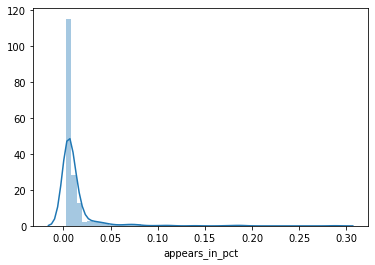

In [46]:
# Tree-Map w/ Words that appear in a least 0.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.0025]
print(wc.shape)

sns.distplot(wc['appears_in_pct']);

In [49]:
wc.tail(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1010,primarily,73,73,681.0,0.000230,0.791962,0.002577
1203,require,73,73,682.0,0.000230,0.792191,0.002577
1397,mind,71,73,684.0,0.000230,0.792650,0.002506
1472,excited,73,73,685.0,0.000230,0.792880,0.002577
2784,responsive,72,73,689.0,0.000230,0.793798,0.002541
702,operated,71,72,691.0,0.000226,0.794251,0.002506
2299,sharp,72,72,694.0,0.000226,0.794930,0.002541
341,electronic,71,71,695.0,0.000223,0.795153,0.002506
925,prefer,71,71,697.0,0.000223,0.795600,0.002506
1125,given,71,71,698.0,0.000223,0.795823,0.002506


In [50]:
# preferred approach for statistical trimming
# lower bound use counts (i.e. must appear in 2 docs)
# upper bound use percentage (i.e. must not appear in more than 50%)
wc = wc[wc['appears_in'] >= 5]
print(wc.shape)
wc.tail(10)

(675, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1010,primarily,73,73,681.0,0.000230,0.791962,0.002577
1203,require,73,73,682.0,0.000230,0.792191,0.002577
1397,mind,71,73,684.0,0.000230,0.792650,0.002506
1472,excited,73,73,685.0,0.000230,0.792880,0.002577
2784,responsive,72,73,689.0,0.000230,0.793798,0.002541
702,operated,71,72,691.0,0.000226,0.794251,0.002506
2299,sharp,72,72,694.0,0.000226,0.794930,0.002541
341,electronic,71,71,695.0,0.000223,0.795153,0.002506
925,prefer,71,71,697.0,0.000223,0.795600,0.002506
1125,given,71,71,698.0,0.000223,0.795823,0.002506


## Challenge

In the module project, you will apply stop word removal to a new corpus. You will focus on applying dictionary based stop word removal, but as a stretch goal, you should consider applying statistical stopword trimming. 

# Stemming & Lemmatization (Learn)
<a id="p3"></a>

## Overview

You can see from our example above there is still some normalization to do to get a clean analysis. You notice that there many words (*i.e.* 'batteries', 'battery') which share the same root word. We can use either the process of stemming or lemmatization to trim our words down to the 'root' word. 

__Section Agenda__:

- Which is which
- why use one v. other
- show side by side visualizations 
- how to do it in spacy & nltk
- introduce PoS in here as well

## Follow Along

### Stemming

> *a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.* - [Martin Porter](https://tartarus.org/martin/PorterStemmer/)

Some examples include:
- 'ing'
- 'ed'
- 's'

These rules are by no means comprehensive, but they are somewhere to start. Most stemming is done by well documented algorithms such as Porter, Snowball, and Dawson. Porter and its newer version Snowball are the most popular stemming algorithms today. For more information on various stemming algorithms check out [*"A Comparative Study of Stemming Algorithms"*](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf) 


Spacy does not do stemming out of the box, but instead uses a different technique called *lemmatization* which we will discuss in the next section. Let's turn to an antique python package `nltk` for stemming. 

In [51]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["python", "pythoning", "pythonly", "pythons", "loves", "pythonic", 'replies']

for word in words:
    print(ps.stem(word))

python
python
pythonli
python
love
python
repli


### Two Minute Challenge

Apply the Porter stemming algorithm to the tokens in the `df` dataframe. Visualize the results in the tree graph we have been using for this session.

In [52]:
from tqdm import tqdm
tqdm.pandas()

100%|██████████| 28332/28332 [00:05<00:00, 5408.35it/s]
(18679, 7)


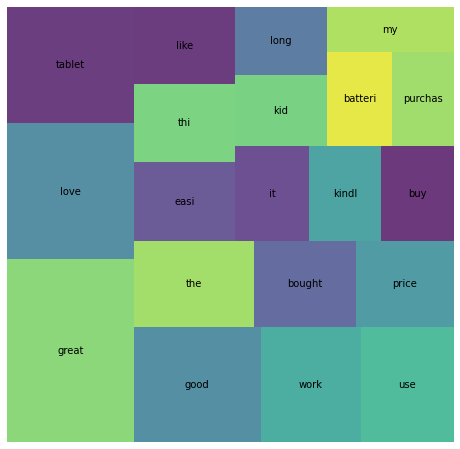

In [107]:
def get_stems(text):
    return [ps.stem(word.lower()) for word in text.split() if word not in STOP_WORDS]

df['stems'] = df['reviews.text'].progress_apply(get_stems)

wc = count(df['stems'])
print(wc.shape)

wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

### Lemmatization

You notice immediately that results are kinda funky - words just oddly chopped off. The Porter algorithm did exactly what it knows to do: chop off endings. Stemming works well in applications where humans don't have to worry about reading the results. Search engines and more broadly information retrieval algorithms use stemming. Why? Because it's fast. 

Lemmatization on the other hand is more methodical. The goal is to transform a word into its base form called a lemma. Plural nouns with funky spellings get transformed to singular tense. Verbs are all transformed to the transitive. Nice tidy data for a visualization. :) However, this tidy data can come at computational cost. Spacy does a pretty freaking good job of it though. Let's take a look:

In [108]:
sent = "men man women woman wolf wolves run runs running replies"
doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

men    man
man    man
women    women
woman    woman
wolf    wolf
wolves    wolf
run    run
runs    run
running    run
replies    reply


In [109]:
# Re-load nlp without parser/tagger to speed up pipeline
nlp = spacy.load('en_core_web_md', disable=['parser', 'tagger'])

# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [119]:

def get_lemmas(text):

    lemmas = []
    doc = nlp(text)

    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            lemmas.append(token.lemma_.lower())

    return lemmas



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [120]:
%%time

df['lemmas'] = df['reviews.text'].progress_apply(get_lemmas)  # Might take a few minutes!

 34%|███▍      | 9727/28332 [05:48<11:07, 27.87it/s]


KeyboardInterrupt: 

In [ ]:
cols = ['lemmas', 'reviews.text']
df[cols].head()

In [ ]:
# To make this comparison more interesting, let's compare: All Amazon Reviews, Fire HD 8 only, and Kindle only
df['FireHD_8'] = df['name'].str.contains('fire hd 8', case=False)
df['Kindle'] = df['name'].str.contains('kindle', case=False)

# Use the Function for all reviews, Fire HD 8 only, and Kindle only
wc = count(df['lemmas'])
wc_fire_hd_8 = count(df[df['FireHD_8'] == True]['lemmas'])
wc_kindle = count(df[df['Kindle'] == True]['lemmas'])
print(wc.shape, wc_fire_hd_8.shape, wc_kindle.shape)

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
wc_fire_top20 = wc_fire_hd_8[wc_fire_hd_8['rank'] <= 20]
wc_kindle_top20 = wc_kindle[wc_kindle['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Amazon Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Fire HD 8 Tablet')
squarify.plot(sizes=wc_fire_top20['pct_total'], label=wc_fire_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Kindle')
squarify.plot(sizes=wc_kindle_top20['pct_total'], label=wc_kindle_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

## (Bonus Material) ScatterText

To run this section, go to your terminal and execute: 

- pip install scattertext

## Challenge

You should know how to apply lemmatization with Spacy to a corpus of text. 

## Scattertext Kindle vs. FireHD Comparison

To run this section, go to your terminal and execute: 

- pip install scattertext

In [ ]:
# Create a copy and add column with product tags
subset_df = df.copy()
subset_df.loc[subset_df['name'].str.contains('kindle', case=False), 'product'] = 'Kindle'
subset_df.loc[subset_df['name'].str.contains('fire hd 8', case=False), 'product'] = 'Fire HD 8'

# Drop Review that aren't Kindle/Fire HD 8
subset_df.dropna(subset=['product'], inplace=True)

# Confirm shape and distribution of reviews
print(subset_df.shape)
subset_df['product'].value_counts()

In [ ]:
import spacy
import scattertext as st

nlp = spacy.load("en_core_web_md")

corpus = st.CorpusFromPandas(subset_df, 
                             category_col='product', 
                             text_col='reviews.text',
                             nlp=nlp).build()

html = st.produce_scattertext_explorer(
    corpus,
    category='Kindle',
    category_name='Kindle',
    not_category_name='Fire HD 8',
    width_in_pixels=1000,
    metadata=subset_df['reviews.rating'])

open('./kindle_vs_firehd8.html', 'w').write(html)

# Review

In this module project, you've seen us apply Natural Language Processing techniques (tokenization, stopword removal, and lemmatization) to a corpus of Amazon text reviews. We analyzed those reviews using these techniques and discovered that Amazon customers are generally satisfied with the battery life of Amazon products and generally appear satisfied. 

You will apply similar techniques to today's [module project assignment](LS_DS_411_Text_Data_Assignment.ipynb) to analyze coffee shop reviews from yelp. Remember that the techniques of processing the text are just the beginning. There are many ways to slice and dice the data. 

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf

## Advanced Resources & Techniques
- Named Entity Recognition (NER)
- Dependcy Trees 
- Generators
- the major libraries (NLTK, Spacy, Gensim)